# Evaluation of the narrative forms in the Spectators (part 2)
In the second part of the narrative forms evaluation process, we will load the pickle file created using the previous notebook, to evaluate and visualize the narrative forms. 

In [1]:
import pandas as pd
import random
import collections
import colored
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib as cm
import matplotlib.patches as mpatches

In [2]:
output = 'Y:/data/projekte/dispecs/topicModeling/output/DataEvaluation/'

## Load the pickled data frame

In [13]:
df = pd.read_pickle(output+"Bastide_narrative-forms.pkl")
df['narrative forms'].replace('', 'None', inplace=True)
df

,id,periodical,narrative forms
0,o:mws.3146,Le Nouveau Spectateur,D; D
1,o:mws.3147,Le Nouveau Spectateur,MT; LB; FP; SP; D; D; LB; MT; LB; MT; AE; FP; ...
2,o:mws.3148,Le Nouveau Spectateur,MT; D; MT; D; AE; MT; AE; D; MT; AE; D
3,o:mws.3149,Le Nouveau Spectateur,MT; LB; AE; FP; FP; FP; AE; D; D; D; LB; LB; A...
4,o:mws.3150,Le Nouveau Spectateur,AE
5,o:mws.3151,Le Nouveau Spectateur,MT; LB; AE; MT; FP; MT; LB; AE; D; D; LB; MT; ...
6,o:mws.3152,Le Nouveau Spectateur,LB; LB; LB; LB; D; D; LB; LB
7,o:mws.3156,Le Nouveau Spectateur,None
8,o:mws.3158,Le Nouveau Spectateur,MT; LB; AE; FP; MT; MT; AE; D; AE; D; MT; AE; ...
9,o:mws.3159,Le Nouveau Spectateur,LB; MT; AE; FP; FP; D; D; LB; D; D; D; D; MT; ...


## Evaluate the periodicals, languages, and keywords

In [14]:
# list all narrative forms
l = df['narrative forms'].tolist()
forms = []
for form in l:
    if ';' in form:
        splited = form.split('; ')
        for split in splited:
            forms.append(split)
    else:
        forms.append(form)


In [15]:
def get_forms(forms):
    """Makes a narrative forms dictionary with narrative forms as keys and numbers of occurrences as values."""
    d = dict(zip(forms, [0] * len(forms)))
    for f in forms:
        d[f] += 1
    return d

In [16]:
# create a dictionary
d_all_forms = get_forms(forms)
# sort the dictionary by values
d_all_forms = collections.OrderedDict(sorted(d_all_forms.items(), key=lambda x:x[1], reverse=True)) 
print("Number of narrative assignments: ",len(forms))
print("Number of unique narrative forms: ",len(set(forms)), '\n')
print("Number of assignments per narrative form:\n")
for f in d_all_forms:
    print(f, ':', d_all_forms[f])

Number of narrative assignments:  1393
Number of unique narrative forms:  13 

Number of assignments per narrative form:

MT : 357
LB : 346
D : 245
AE : 199
ZM : 105
FP : 90
None : 20
EX : 12
SP : 9
TR : 4
AL : 4
F : 1
UT : 1


In [17]:
def get_periodical_forms(periodical_name):
    """
    Gets all terms that were manually assigned to a specific periodical.
    """
    mask_periodical = df.loc[df['periodical'] == periodical_name]
    mask_list = mask_periodical['narrative forms'].tolist() 
    periodical_forms = []
    for form in mask_list:
        if ';' in form:
            splited = form.split('; ')
            for split in splited:
                periodical_forms.append(split)
        else:
            periodical_forms.append(form)

    d = dict(zip(periodical_forms, [0] * len(periodical_forms)))
    for f in periodical_forms:
        d[f] += 1
    return d

In [26]:
# make a dictionary for a specific periodical, ordered by value 
periodical_name = "Le Monde comme il est" #Le Spectateur français, ou Journal des moeurs #Le Spectateur français ou Journal des Mœurs
d_periodical = get_periodical_forms(periodical_name)
d_periodical = collections.OrderedDict(sorted(d_periodical.items(), key=lambda x:x[1], reverse=True))
print(len(d_periodical), 'forms are assigned to the periodical', periodical_name)
print('Number of assignments per form:\n')
for f in d_periodical:
    print(f, ':', d_periodical[f])

11 forms are assigned to the periodical Le Monde comme il est
Number of assignments per form:

MT : 111
LB : 65
AE : 59
D : 52
ZM : 23
FP : 22
None : 3
AL : 2
F : 1
UT : 1
EX : 1


# Visualization

## Bar charts

<IPython.core.display.Javascript object>


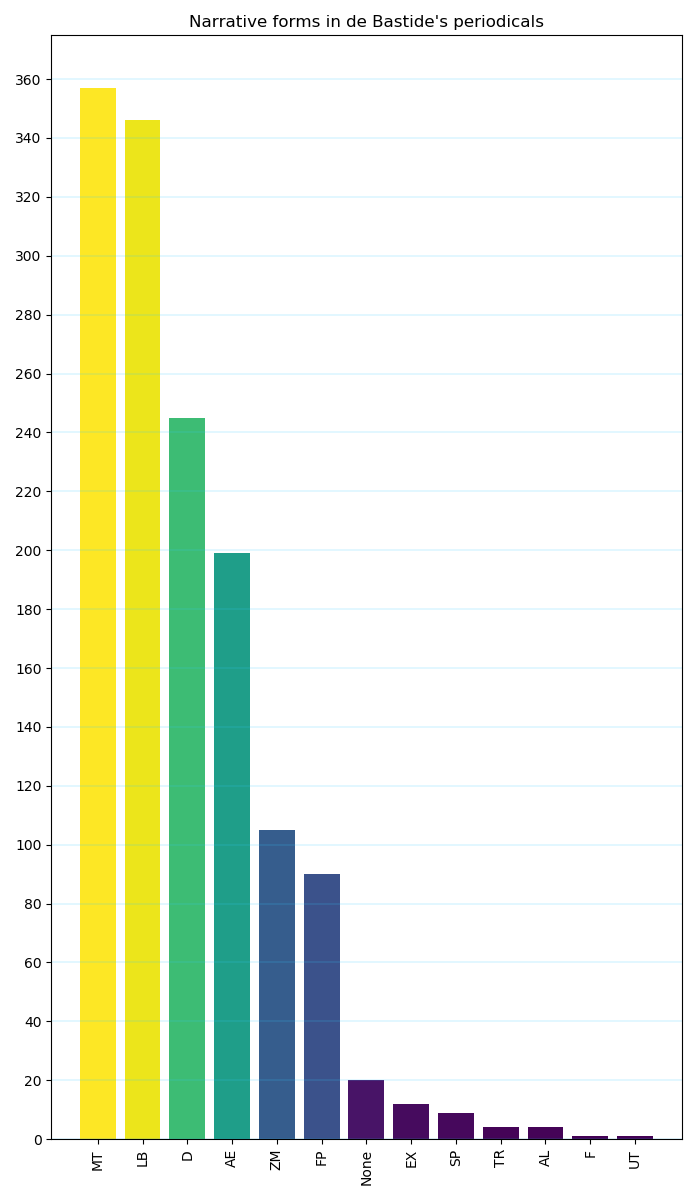

In [19]:
# bar chart of all narrative forms in the subset
%matplotlib notebook

cmap = mpl.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(d_all_forms.items(), key=lambda k: k[1])[1], vmax=max(d_all_forms.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(d_all_forms.values())]

plt.bar(range(len(d_all_forms)), list(d_all_forms.values()), align='center', color=color)
title = "Narrative forms in de Bastide's periodicals"
plt.title(title)
plt.xticks(range(len(d_all_forms)), list(d_all_forms.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(7, 12, forward=True)
fig.tight_layout()
fig.savefig(output+'barcharts/Bastide_forms_total.png', dpi=500) #, bbox_inches='tight'

<IPython.core.display.Javascript object>


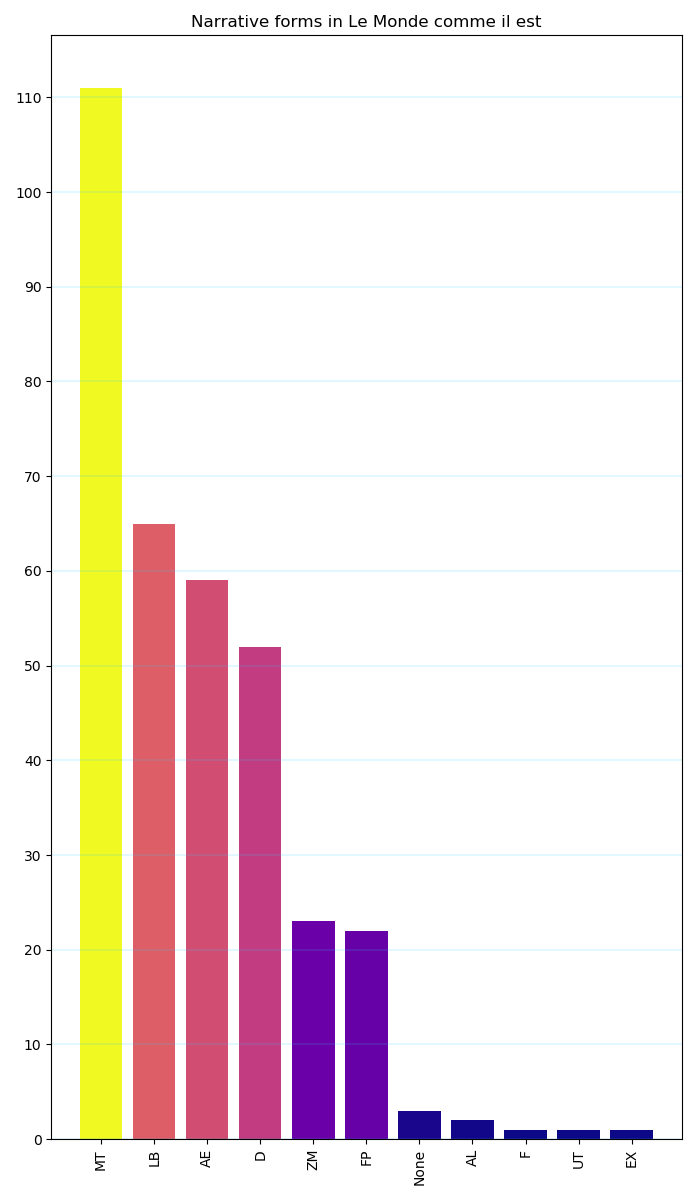

In [27]:
%matplotlib notebook
   
cmap = mpl.cm.get_cmap("plasma")
norm = mpl.colors.Normalize(vmin=min(d_periodical.items(), key=lambda k: k[1])[1], vmax=max(d_periodical.items(), key=lambda k: k[1])[1])
color = [cmap(norm(x)) for x in list(d_periodical.values())]
    
plt.clf() # This method clears the buffer, so images saved with savefig() don't overlap
plt.bar(range(len(d_periodical)), list(d_periodical.values()), align='center', color=color)
title = 'Narrative forms in ' + periodical_name # set a title for your graphic
plt.title(title)
plt.xticks(range(len(d_periodical)), list(d_periodical.keys()))
plt.xticks(rotation=90)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linewidth=0.2, color='#33ccff')
fig = plt.gcf()
fig.set_size_inches(7, 12, forward=True)
fig.tight_layout()
fig.savefig(output+'barcharts/narrative-forms_'+periodical_name+'.png', dpi=500) #, bbox_inches='tight'